# Linear and quadratic discriminant analysis

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

This notebook experiments with linear and quadratic discriminant discriminant analysis on some simple synthetic datasets. The code here was used to generate several of the figures used in the lectures. 

## Imports and setup

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

import seaborn as sns

In [ ]:
sns.set_style('white')

## Setup some helper functions

Create some functions for plotting the data and the classifier decision boundary.

In [ ]:
def plot_data(X, y, figsize=(7,7)):
    figure(figsize=figsize)
    scatter(X[:, 0], X[:, 1], c=y, s=70, cmap=cm.Paired, alpha=0.7)
    xlim(X[:,0].min()-1, X[:,0].max()+1)
    ylim(X[:,1].min()-1, X[:,1].max()+1)
    legend()
    xlabel('$x_1$')
    ylabel('$x_2$')
    
def make_meshgrid(X, y):
    x1 = np.linspace(X[:,0].min()-1, X[:, 0].max()+1, 200)
    x2 = np.linspace(X[:,1].min()-1, X[:, 1].max()+1, 200)
    X1, X2 = np.meshgrid(x1, x2)
    return X1, X2

def plot_decision_regions(clf, X, y, title=None, figsize=(7,7), meshgrid=None):
    if meshgrid is None:
        X1, X2 = make_meshgrid(X, y)
    else:
        X1, X2 = meshgrid
    pts = np.c_[X1.ravel(), X2.ravel()]
    f = clf.predict(pts).reshape(X1.shape)
    figure(figsize=figsize)
    if title:
        plt.title(title)
    contourf(X1, X2, f, cmap=cm.Paired, alpha=0.5)
    scatter(X[:,0], X[:,1], c=y, cmap=cm.Paired, s=70)
    xlim(X1.min(), X1.max())
    ylim(X2.min(), X2.max())
    xlabel('$x_1$')
    ylabel('$x_2$')

Generate some synthetic data for classification. Here we use scikit-learn's ``make_blobs`` function which generates random isotropic Gaussian blobs. We're doing binary classification, so we need two blobs. 

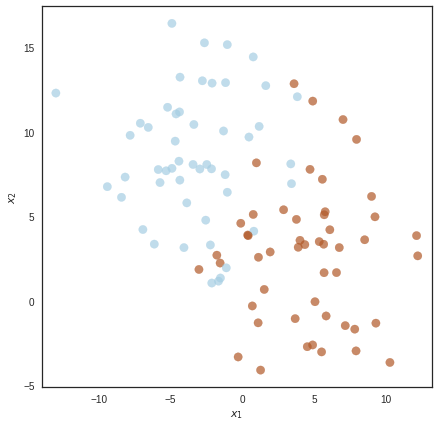

In [ ]:
X, y = make_blobs(centers=2, cluster_std=4, random_state=42)
plot_data(X, y)

## Quadratic discriminant analysis (QDA)

In QDA we assume that our data comes from two independent multivariate Normal distributions $\mathcal{N}(\mu_0, \Sigma_0)$ and $\mathcal{N}(\mu_1, \Sigma_1)$. To **fit** the model, we simply fit a multivariate Gaussian to all data from class 0 and fit another multivariate Gaussian to all data from class 1.

At **prediction** time, we can select the class corresponding to the distribution under which the observation is more probable. In the code below, this is implemented by checking if the log odds is greater than zero (convince yourself that this is equivalent!)

In [ ]:
class QDA(object):
    def fit(self, X, y):
        self.mu_0 = np.mean(X[y==0], axis=0)
        self.mu_1 = np.mean(X[y==1], axis=0)
        self.S_0 = np.cov(X[y==0].T)
        self.S_1 = np.cov(X[y==1].T)
        self.P0 = multivariate_normal(self.mu_0, self.S_0)
        self.P1 = multivariate_normal(self.mu_1, self.S_1)
        return self
        
    def predict(self, X):
        return np.log(self.P1.pdf(X)/self.P0.pdf(X)) >= 0.0

### Fit the model

Here we fit the model to the data, classify the training data using the model, and plot the resulting decision boundary.

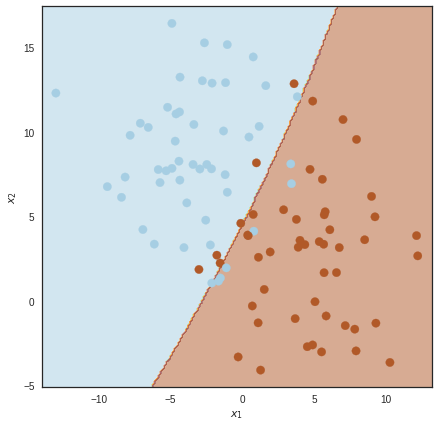

In [ ]:
qda = QDA().fit(X, y)
plot_decision_regions(qda, X, y)

Note that the decision boundary is a quadratic curve. To see this more formally, plug in the definition for the Gaussian PDF into the log-odds decision function: $$\log\frac{p_1}{p_0} \geq 0$$ and simplify. The result is a quadratic function. This is why the algorithm is called *quadratic* discriminant analysis.

The fact that the boundary is quadratic is clearer with the data below.

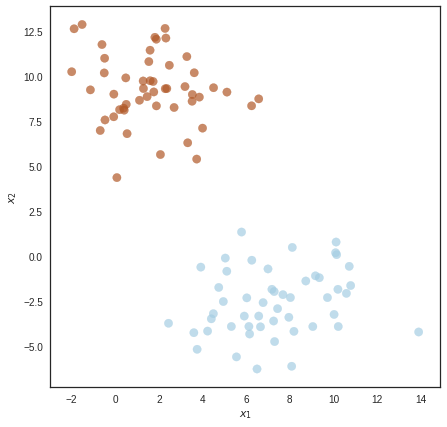

In [ ]:
X, y = make_blobs(centers=2, cluster_std=2, random_state=32)
plot_data(X, y)

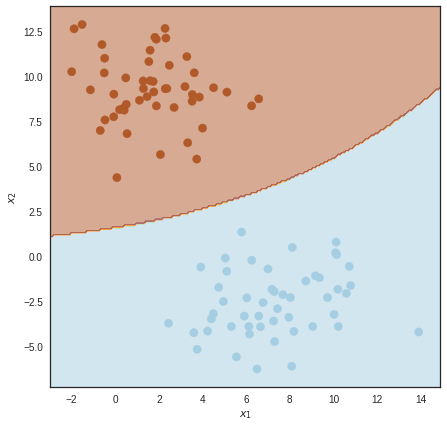

In [ ]:
qda = QDA().fit(X, y)
plot_decision_regions(qda, X, y)

## QDA on more challenging data

The QDA algorithm works well in the above data because it *is* actually sampled from Gaussian distributions, which satisfies the QDA assumptions.

Here we explore what happens when the data in each class are not Gaussian. To do this we will use the [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function from scikit-learn to generate more challenging datasets.

In [ ]:
from sklearn.datasets import make_classification

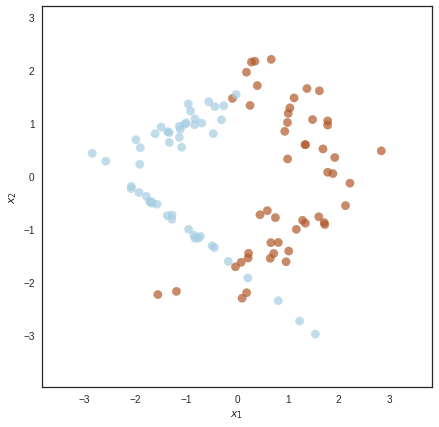

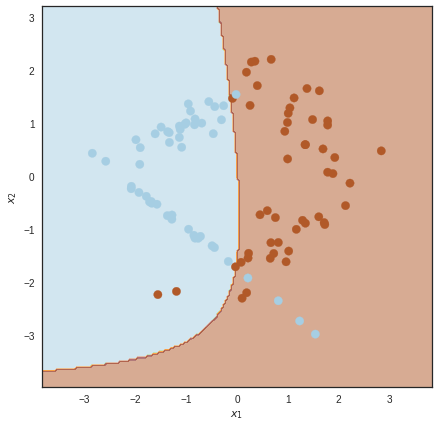

In [ ]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=205)
plot_data(X, y)
show()

qda = QDA().fit(X, y)
plot_decision_regions(qda, X, y)
show()

The resulting decision boundary doesn't subjectively look very good. In particular, the fact that it curves off to the left at the bottom doesn't seem like a good model. A straight line down the middle would probably be a better decision boundary for this particular dataset.

The problem here is that the QDA assumptions are badly violated. Clearly each class is not Normally distributed.

## Linear discriminant analysis (LDA)

Let's try a simpler model: LDA. LDA is very similar to QDA except that we assume equal covariance for both classes. When you do this, things cancel out and you end up with a linear decision function.

Here we'll use the [scikit-learn implementation of LDA](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) instead of writing our own (although it should be straightforward for you to implement based on the lecture notes!)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

First let's see how it does when the examples from each class are indeed normally distributed.

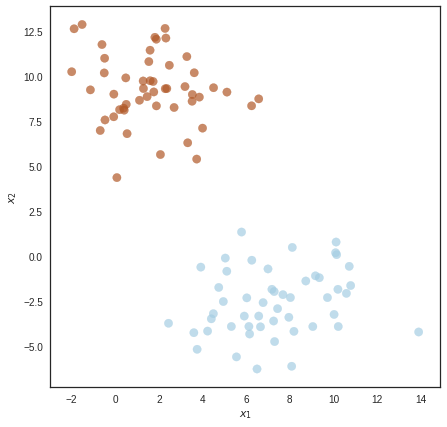

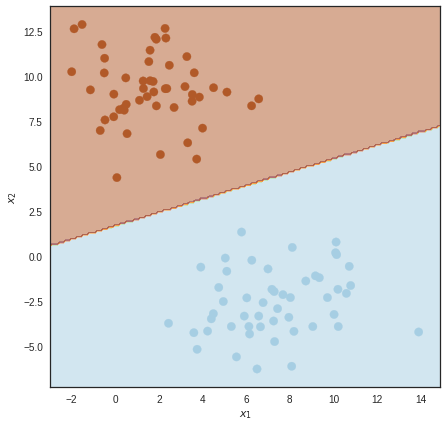

In [ ]:
X, y = make_blobs(centers=2, cluster_std=2, random_state=32)
plot_data(X, y)
show()
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
plot_decision_regions(lda, X, y)
show()

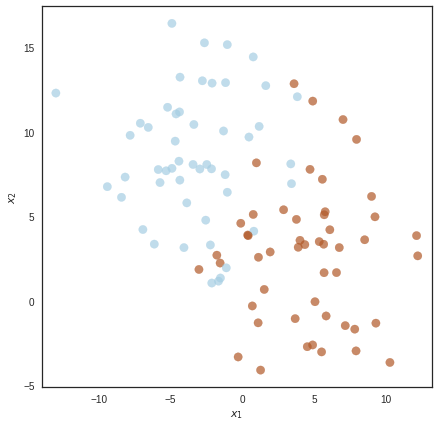

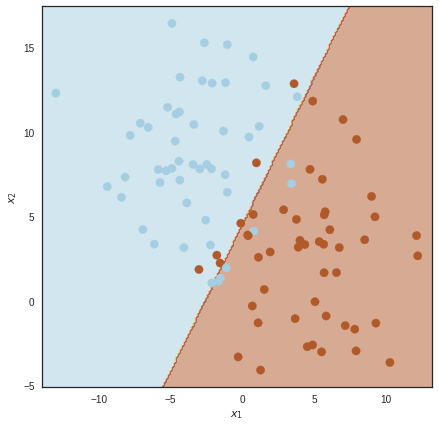

In [ ]:
X, y = make_blobs(centers=2, cluster_std=4, random_state=42)
plot_data(X, y)
show()
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
plot_decision_regions(lda, X, y)
show()

As expected, both of the above cases work well.

What about non-normally distributed data?

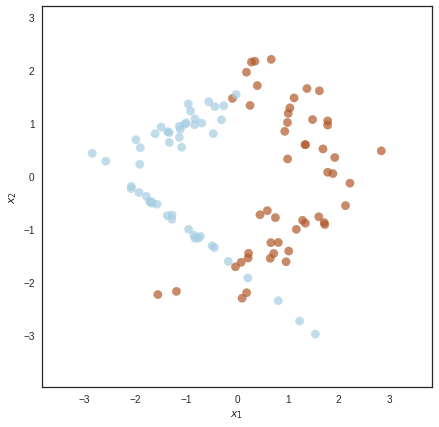

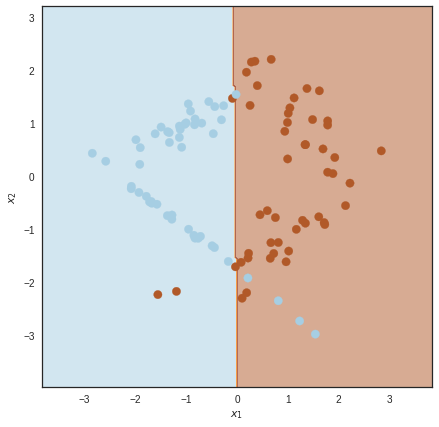

In [ ]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=205)
plot_data(X, y)
show()
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
plot_decision_regions(lda, X, y)
show()

This decision boundary looks much better than the one given by QDA even though the LDA assumptions are clearly violated! 

This is because the decision boundary for an LDA model is a line, and a line is clearly a better idea than a quadratic curve in this case. The LDA model also has far fewer effective parameters than QDA (see notes), which makes it less prone to overfitting.